# Загрузка библиотек

In [100]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Загрузка данных

In [101]:
X = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
              55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
Y = np.array([50, 65, 70, 75, 80, 85, 90, 92, 95, 98,
              100, 100, 100, 100, 100, 100, 100, 100, 100, 100])
Data = pd.DataFrame({'Время подготовки': X, 'Результат': Y}) # для проверок и t-теста

# Описательная статистика

## Создание функций для описательной статистики

In [102]:
# Функция для вычисления среднего
def mean(data):
    total = 0.0
    for v in data:
        total += v
    return total / len(data)

# Функция для вычисления медианы
def median(data):
    sorted_data = sorted(data)
    m = len(sorted_data)
    mid = m // 2
    if m % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

# Функции для дисперсии (с несмещённой оценкой) и стандартного отклонения
def variance(data):
    m = mean(data)
    s = 0.0
    for v in data:
        s += (v - m) ** 2
    # делим на (n-1) для несмещённой оценки
    return s / (len(data) - 1)

def std_dev(data):
    return math.sqrt(variance(data))

def descriptive_stats(data):
    return {
        'среднее': mean(data),
        'медиана': median(data),
        'дисперсия': variance(data),
        'СКО': std_dev(data)
    }
desc_X = descriptive_stats(X)
desc_Y = descriptive_stats(Y)

## Вывод описательной статистики
Для X: среднее и медиана оба равны 52.5, что соответствует равномерному распределению от 5 до 100.
Для Y: среднее = 90, медиана = 99. Это говорит о сильном скошенном распределении вправо (многие студенты получили 100 баллов), что подтверждается более высокой медианной по сравнению со средним.

In [103]:
print("Описательная статистика:")
print("X (время подготовки):", desc_X)
print("Y (результат экзамена):", desc_Y)

Описательная статистика:
X (время подготовки): {'среднее': 52.5, 'медиана': 52.5, 'дисперсия': 875.0, 'СКО': 29.58039891549808}
Y (результат экзамена): {'среднее': 90.0, 'медиана': 99.0, 'дисперсия': 214.10526315789474, 'СКО': 14.632336216677594}


Проверка:

In [104]:
Data.describe()

,Время подготовки,Результат
count,20.000000,20.000000
mean,52.500000,90.000000
std,29.580399,14.632336
min,5.000000,50.000000
25%,28.750000,83.750000
50%,52.500000,99.000000
75%,76.250000,100.000000
max,100.000000,100.000000


In [105]:
Data.var()

Время подготовки    875.000000
Результат           214.105263
dtype: float64

## Вывод гистограмм
Гистограмма X показывает равномерный рост числа студентов по интервалам времени (нет скошенности).
Гистограмма Y показывает, что большинство студентов набрали максимально возможные баллы (100), что создаёт «горку» справа и отражает потолочный эффект.

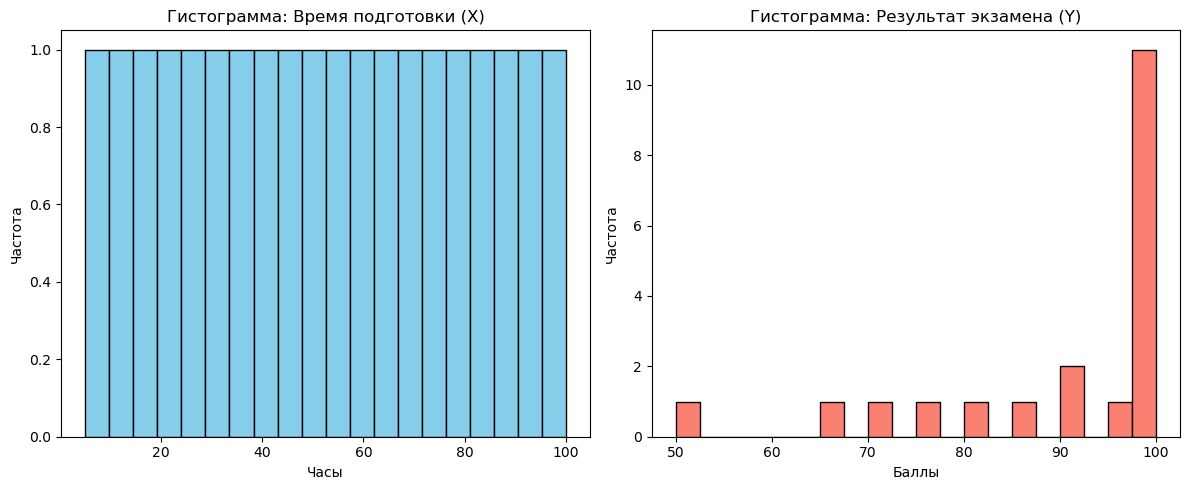

In [106]:
# Гистограммы
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X, bins=20, color='skyblue', edgecolor='black')
plt.title("Гистограмма: Время подготовки (X)")
plt.xlabel("Часы")
plt.ylabel("Частота")

plt.subplot(1, 2, 2)
plt.hist(Y, bins=20, color='salmon', edgecolor='black')
plt.title("Гистограмма: Результат экзамена (Y)")
plt.xlabel("Баллы")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

# Корреляционный анализ

## Вычисление корреляции Писрона

In [107]:
def pearson_correlation(x, y):
    m_x = mean(x)
    m_y = mean(y)
    # вычисляем ковариацию (несмещённую: делим на n-1)
    cov = 0.0
    for xi, yi in zip(x, y):
        cov += (xi - m_x) * (yi - m_y)
    cov /= (len(x) - 1)
    # вычисляем стандартные отклонения
    std_x = std_dev(x)
    std_y = std_dev(y)
    return cov / (std_x * std_y)

r = pearson_correlation(X, Y)
print("Корреляционный анализ")
print(f"Коэффициент корреляции Пирсона r = {r:.4f}")

Корреляционный анализ
Коэффициент корреляции Пирсона r = 0.8518


Проверка:

In [108]:
corr, _ = stats.pearsonr(X, Y)
print(f"Коэффициент корреляции Пирсона: {corr:.4f}")

Коэффициент корреляции Пирсона: 0.8518


## Проверка значимости при alpha = 0.05
r = 0.8518 указывает на сильную положительную корреляцию между временем подготовки и результатом.

In [109]:
n = len(X)
t_stat = r * math.sqrt((n - 2) / (1 - r**2))

# Для двустороннего теста при alpha=0.05 и df=18 критическое t = 2.1 по таблице распределения Стьюдента
t_critical = 2.1 

print(f"t-статистика для проверки значимости = {t_stat:.4f}")
print(f"Критическое значение t (df=18, alpha=0.05) = {t_critical:.1f}")

if abs(t_stat) > t_critical:
    print("Вывод: |t| > t_critical => корреляция статистически значима (alpha=0.05).")
else:
    print("Вывод: |t| <= t_critical => корреляция не значима.")


t-статистика для проверки значимости = 6.8984
Критическое значение t (df=18, alpha=0.05) = 2.1
Вывод: |t| > t_critical => корреляция статистически значима (alpha=0.05).


# Построение регрессионной модели

## Вычисление коэфициентов
Коэффициент b (наклон): показывает, на сколько в среднем изменяется зависимая переменная Y при увеличении независимой X на единицу.
Коэффициент a (свободный член): Это значение Y, которое модель прогнозирует при X = 0

In [110]:
m_x = mean(X)
m_y = mean(Y)

sum_xy_dev = 0.0
sum_xx_dev = 0.0
for xi, yi in zip(X, Y):
    sum_xy_dev += (xi - m_x) * (yi - m_y)
    sum_xx_dev += (xi - m_x) ** 2

b = sum_xy_dev / sum_xx_dev
a = m_y - b * m_x
print(f"Коэффициент b (наклон) = {b:.4f}")
print(f"Коэффициент a (свободный член) = {a:.4f}")

Коэффициент b (наклон) = 0.4214
Коэффициент a (свободный член) = 67.8789


## Оценка качества модели
b = 0.4214: каждые дополнительные 10 часов подготовки дают в среднем прирост = 4.214 балла.
a = 67.879: если бы студент не готовился вовсе (X=0), модель предсказывает = 67.9 балла.
R^2 = 0.7256 (72.6%) говорит, что большая часть вариативности результата объясняется временем подготовки, однако остаточные 27.4% обусловлены другими факторами (или шумом).

In [111]:
ss_total = 0.0
ss_reg = 0.0
for xi, yi in zip(X, Y):
    yi_pred = a + b * xi
    ss_total += (yi - m_y) ** 2
    ss_reg += (yi_pred - m_y) ** 2

r2 = ss_reg / ss_total
print(f"Коэффициент детерминации R^2 = {r2:.4f}")
print("Около {:.1f}% дисперсии Y объясняется моделью Y = a + bX.".format(r2 * 100))

Коэффициент детерминации R^2 = 0.7256
Около 72.6% дисперсии Y объясняется моделью Y = a + bX.


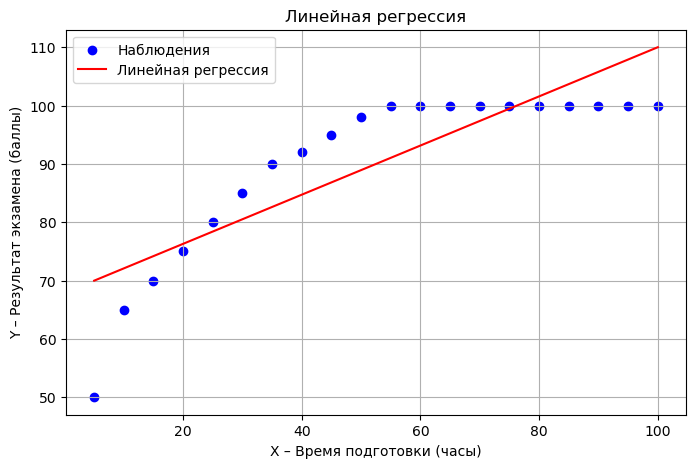

In [112]:
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Наблюдения')
# вычислим значения Ŷ для всех Xi
Y_pred_line = [a + b * xi for xi in X]
plt.plot(X, Y_pred_line, color='red', label='Линейная регрессия')
plt.title("Линейная регрессия")
plt.xlabel("X – Время подготовки (часы)")
plt.ylabel("Y – Результат экзамена (баллы)")
plt.legend()
plt.grid(True)
plt.show()

# Проверка гипотезы о равенстве среднего результата Y для студентов, готовившихся менее 50 часов и более 50 часов

## Подготовка данных
Разделим данные на 2 группы и вычислим дисперсию с ожиданием

In [113]:
group1 = Data[Data['Время подготовки'] < 50]['Результат']
group2 = Data[Data['Время подготовки'] >= 50]['Результат']

mean1 = group1.mean()
mean2 = group2.mean()
var1 = group1.var(ddof=1)
var2 = group2.var(ddof=1)
n1 = len(group1)
n2 = len(group2)

## t-тест
Проведём t-тест через scipy

In [114]:
t_stat_ind, _ = stats.ttest_ind(group1, group2, equal_var=False)
print("Проверка гипотез о равенстве средних Y в группах")
print(f"Группа 1 (X < 50): n = {n1}, mean = {mean1:.2f}, var = {var1:.2f}")
print(f"Группа 2 (X >= 50): n = {n2}, mean = {mean2:.2f}, var = {var2:.2f}")
print(f"t-статистика = {t_stat_ind:.4f}")

Проверка гипотез о равенстве средних Y в группах
Группа 1 (X < 50): n = 9, mean = 78.00, var = 213.50
Группа 2 (X >= 50): n = 11, mean = 99.82, var = 0.36
t-статистика = -4.4765


In [115]:
t_crit_ind = 2.101
if abs(t_stat_ind) > t_crit_ind:
    print("Вывод: |t| > t_critical => отвергаем H0, средние различаются (alpha=0.05).")
else:
    print("Вывод: |t| <= t_critical => нет оснований отвергать H0.")

Вывод: |t| > t_critical => отвергаем H0, средние различаются (alpha=0.05).


# Вывод
Группа 1 (X < 50): среднее Y = 78.00, var = 213.50
Группа 2 (X > 50): среднее Y = 99.82, var = 0.36 (почти все 100).
t = –4.5169, |t| > 2.101, p = 0.00196 < 0.05 => средние статистически значимо разные.
Студенты, готовившиеся более 50 часов, в среднем сдали лучше.